# Car Price Prediction using Random Forest Regressor

## Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. Which variables are significant in predicting the price of a car

## Dataset link :- 
https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

## Data Preprocessing

In [1]:
import pandas as pd

In [2]:
 df = pd.read_csv('car data.csv')

In [3]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
df.shape

(301, 9)

In [5]:
print(df["Seller_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
## check mission/null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [8]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
final_dataset['Current_Year']=2021

In [10]:
final_dataset['no_year']=final_dataset['Current_Year']-final_dataset['Year']

In [11]:
final_dataset.head()

Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59       27000    Petrol      Dealer   
1  2013           4.75           9.54       43000    Diesel      Dealer   
2  2017           7.25           9.85        6900    Petrol      Dealer   
3  2011           2.85           4.15        5200    Petrol      Dealer   
4  2014           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  Current_Year  no_year  
0       Manual      0          2021        7  
1       Manual      0          2021        8  
2       Manual      0          2021        4  
3       Manual      0          2021       10  
4       Manual      0          2021        7

In [12]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [13]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)

In [14]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [15]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        7                 0   
1           4.75           9.54       43000      0        8                 1   
2           7.25           9.85        6900      0        4                 0   
3           2.85           4.15        5200      0       10                 0   
4           4.60           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [16]:
final_dataset.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no_year                     -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                         no_year  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price          -0.236141          0.552339         -0.540571   
Present_Price           0.047584          0.473306         -0.465244   
Kms_Driven              0.524342          0.172515         -0.172874   
Owner                   0.182104         -0.053469          0.055687   
no_year                 1.000000         -0.064315          0.059959   
Fuel_Type_Diesel       -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol        0.059959         -0.979648          1.000000   
Seller_Type_Individual  0.039896         -0.350467          0.358321   
Transmission_Manual    -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
no_year                               0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

# Data-Visualisation

In [17]:
import seaborn as sns

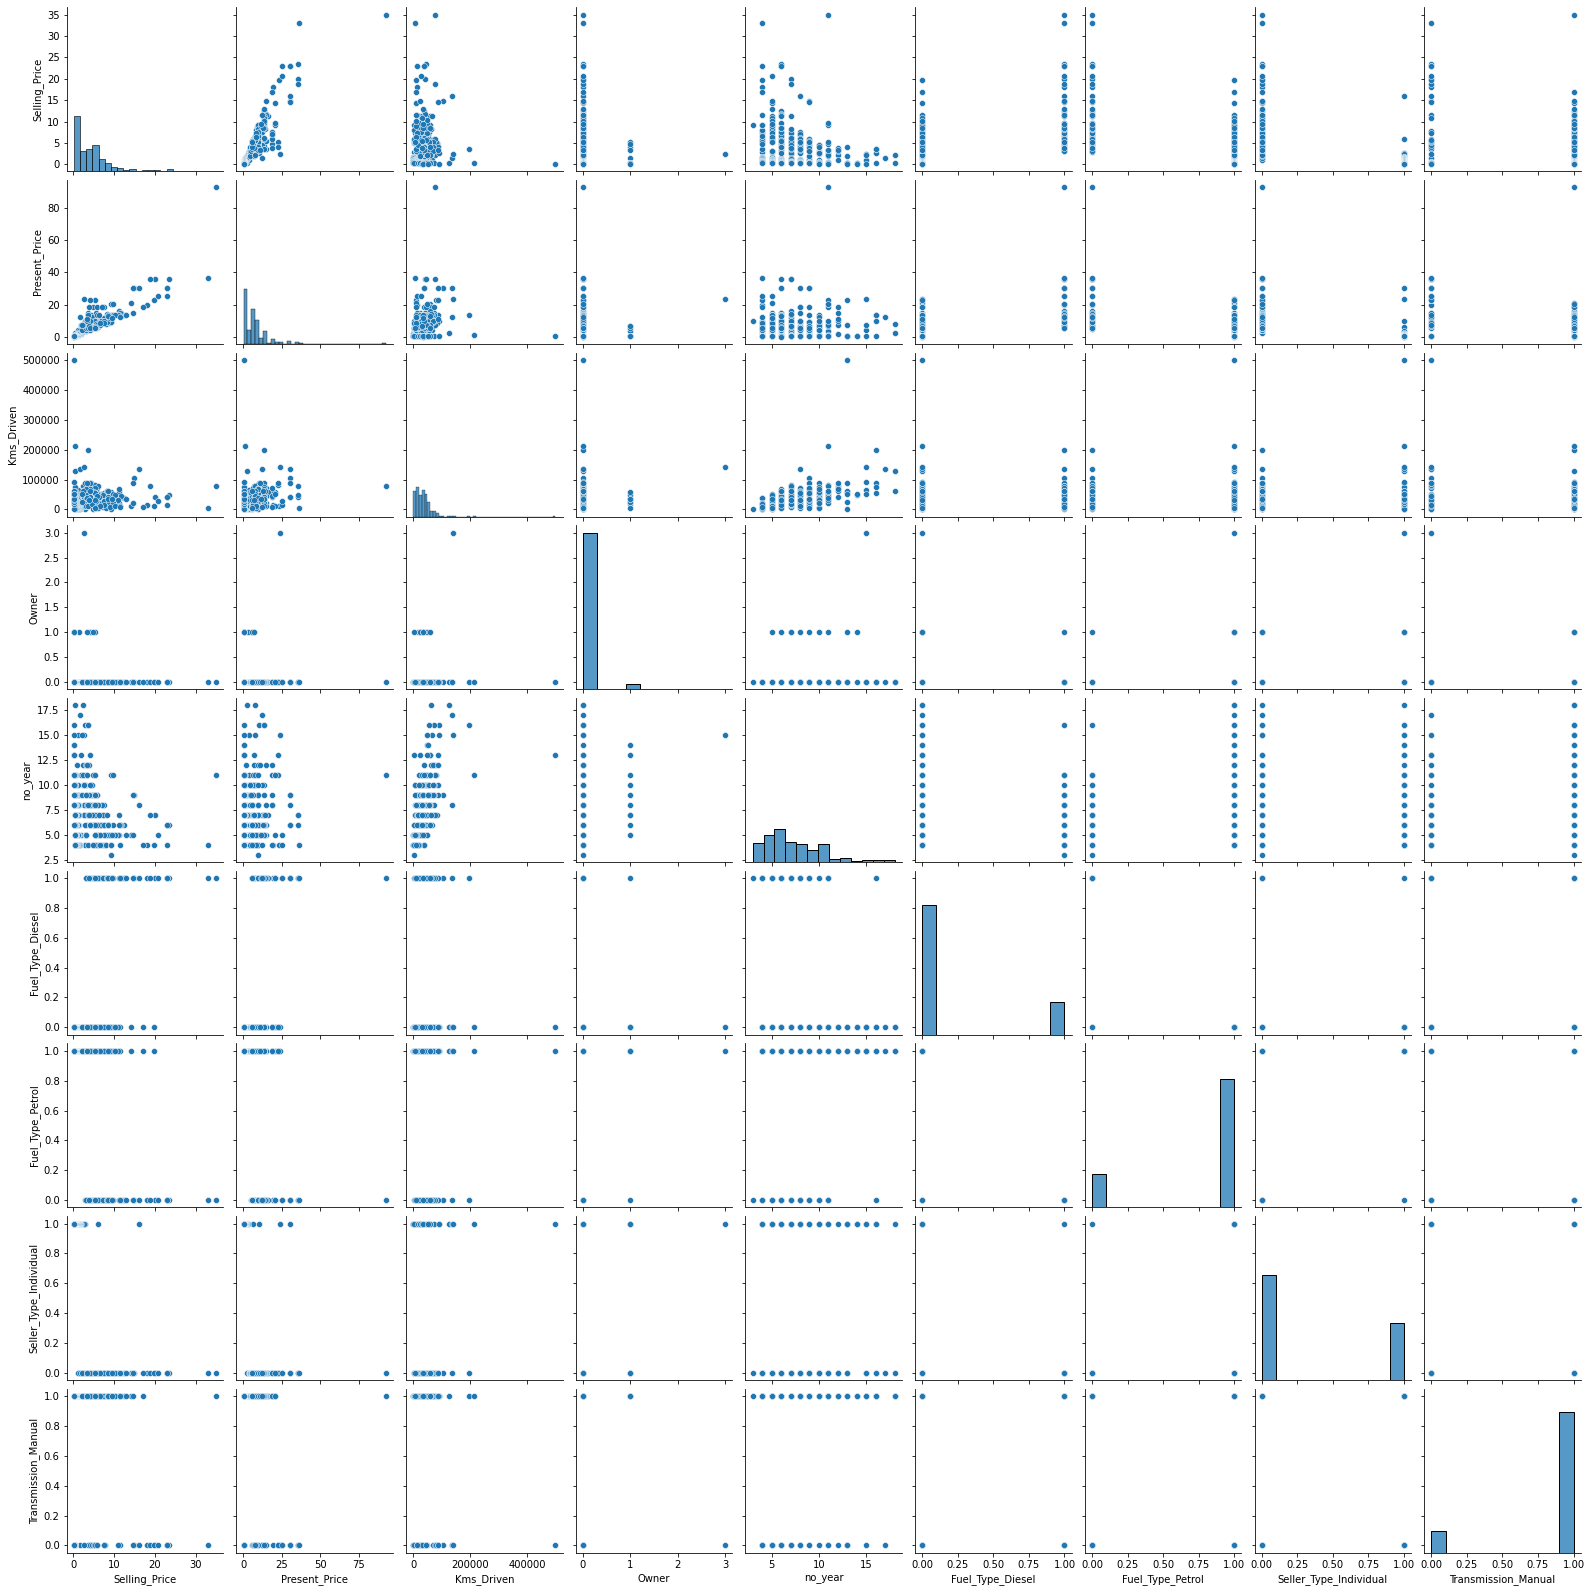

In [18]:
sns.pairplot(final_dataset)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

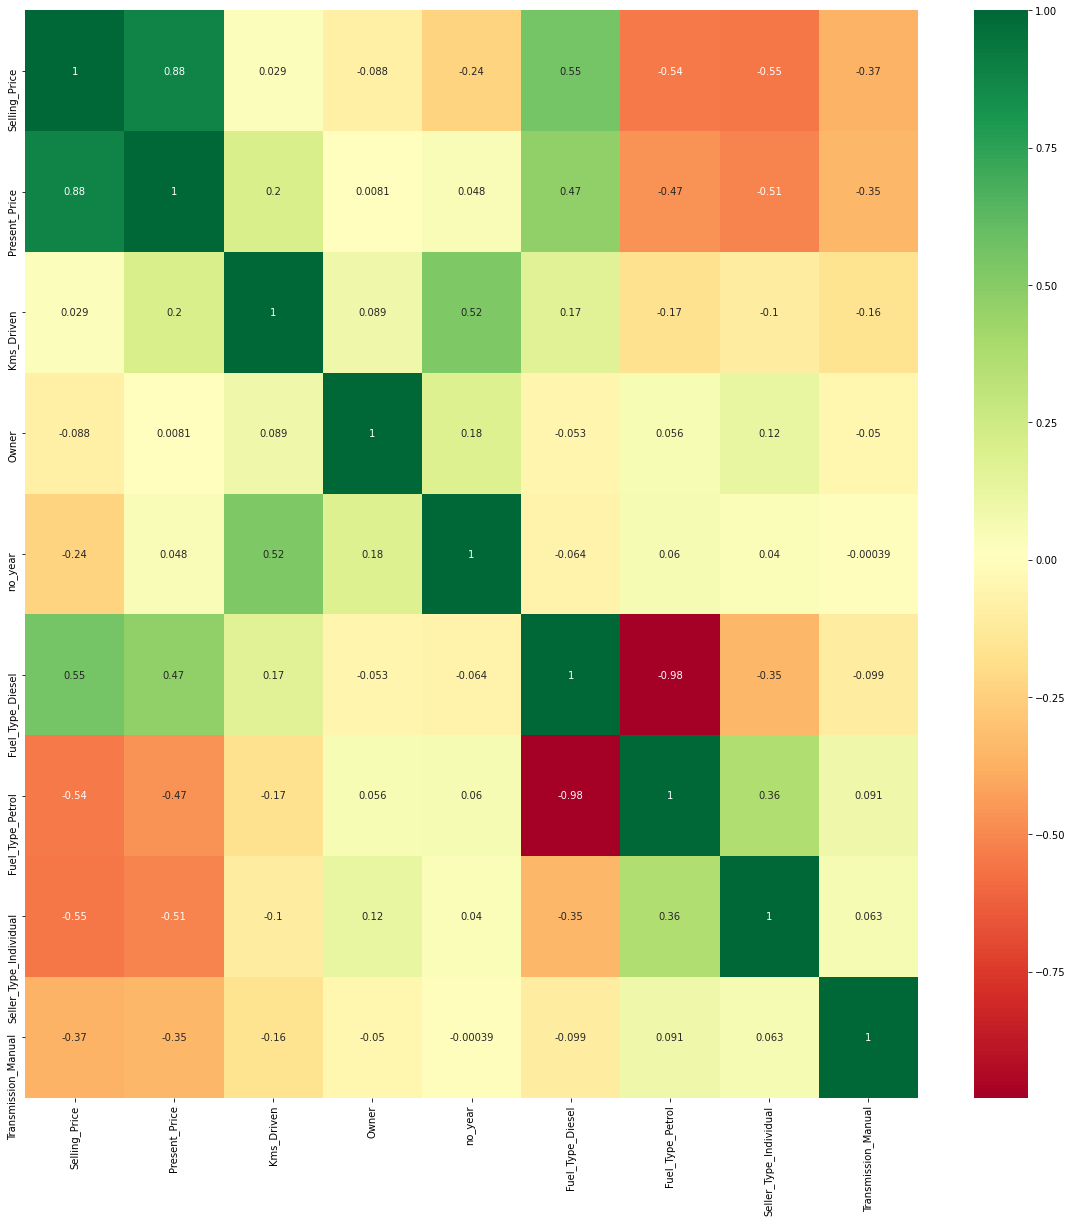

In [20]:

corrmat = final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True, cmap='RdYlGn')

In [21]:
final_dataset.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0        7                 0   
1           4.75           9.54       43000      0        8                 1   
2           7.25           9.85        6900      0        4                 0   
3           2.85           4.15        5200      0       10                 0   
4           4.60           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [23]:
#independent and dependent features

X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [24]:
X.head()

Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           5.59       27000      0        7                 0   
1           9.54       43000      0        8                 1   
2           9.85        6900      0        4                 0   
3           4.15        5200      0       10                 0   
4           6.87       42450      0        7                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1

In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[3.83348531e-01 4.08560046e-02 3.73461245e-04 7.61985654e-02
 2.28609393e-01 1.08920232e-02 1.22151396e-01 1.37570626e-01]


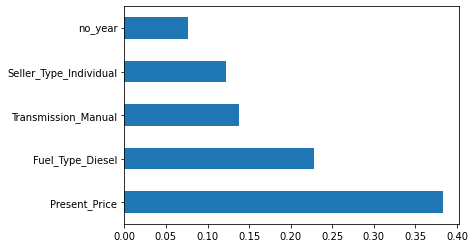

In [29]:
#plotting of graph of feature importance

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
X_train

Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
174           0.72       38600      0        6                 0   
144           0.99       25000      0        7                 0   
212          13.60       22671      0        5                 0   
196           0.52      500000      0       13                 0   
243           7.60        7000      0        5                 0   
..             ...         ...    ...      ...               ...   
181           0.48       50000      0        5                 0   
191           0.57       25000      1        9                 0   
23            3.46       45280      0        7                 0   
159           0.51        4000      0        4                 0   
70            6.76       71000      0        7                 1   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
174                 1                       1                    1  
144                 1                       1                    1  
212                 1                       0                    1  
196                 1                       1                    0  
243                 1                       0                    1  
..                ...                     ...                  ...  
181                 1                       1                    1  
191                 1                       1                    1  
23                  1                       0                    1  
159                 1                       1                    0  
70                  0                       0                    1  

[240 rows x 8 columns]

In [32]:
X_train.shape

(240, 8)

# ML model preparation

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [35]:
# Hyperparameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num =12 )]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

# Predictiong the Results

In [43]:
predictions = rf_random.predict(X_test)

In [44]:
predictions

array([ 0.42823578,  6.54336523,  4.51053508,  0.51499616,  5.25339526,
        0.41187859,  3.59500812,  7.08705453,  1.1462021 , 21.3181618 ,
        0.24429459,  4.46844221, 10.77746653,  2.19624475,  2.87045466,
        2.78251651,  5.56248702,  4.71332205,  0.64855331,  0.48048546,
        1.16921385,  4.98697281,  0.86404259,  0.56195234,  0.26471753,
        4.16548545,  4.66760447,  5.54659743,  6.3007795 ,  0.54582494,
        1.15449372,  7.65211645,  3.23066131,  4.9624319 ,  0.54126424,
        5.68049317,  3.02435804,  1.14775612,  8.57444514,  4.96809414,
        0.63048064, 12.89946909, 13.48483701,  5.83942354,  0.57111473,
        2.54267514,  7.08720208,  5.10635913,  5.07656358,  7.00626737,
        5.68402798,  5.82973362,  3.03374272,  5.81018912, 21.1221698 ,
        2.4988902 ,  2.56008469, 21.03405001,  5.37708202,  0.62723892,
        0.4913718 ])

C:\Users\mrsid\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

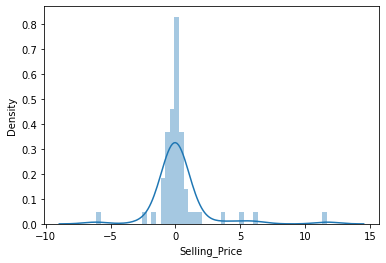

In [45]:
sns.distplot(y_test-predictions)

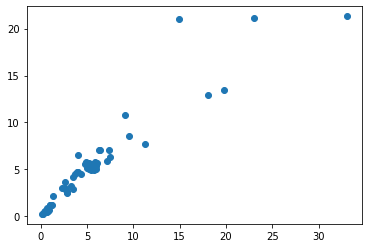

In [51]:
plt.scatter(y_test,predictions)

In [52]:
import pickle

In [53]:
#open a file where we want to store this data

file = open('random_forest_regression_model.pkl', 'wb')

# dump information

pickle.dump(rf_random, file)